> # WILL IT RAIN TOMMOROW IN AUSTRALIA ?

>> ### Table Of Contents:
>> 1. [Data Cleaning](#clean)
>> 2. [Feature Engineering](#engineer)
>> 3. [PCA](#pca)
>> 4. [Model](#model)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")

In [3]:
print(df.shape)
df.head()

(142193, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [53]:
df.tail()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
142188,Uluru,3.5,21.8,0.0,14.9,14.9,E,31.0,ESE,E,...,14.9,14.9,9.4,20.9,No,0.0,0,2017,6,20
142189,Uluru,2.8,23.4,0.0,14.9,14.9,E,31.0,SE,ENE,...,14.9,14.9,10.1,22.4,No,0.0,0,2017,6,21
142190,Uluru,3.6,25.3,0.0,14.9,14.9,NNW,22.0,SE,N,...,14.9,14.9,10.9,24.5,No,0.0,0,2017,6,22
142191,Uluru,5.4,26.9,0.0,14.9,14.9,N,37.0,SE,WNW,...,14.9,14.9,12.5,26.1,No,0.0,0,2017,6,23
142192,Uluru,7.8,27.0,0.0,14.9,14.9,SE,28.0,SSE,N,...,3.0,2.0,15.1,26.0,No,0.0,0,2017,6,24


In [4]:
# df.groupby('Location').agg({'MinTemp':['min','mean','max']})

In [5]:
# df.groupby('Location').MinTemp.median()

In [6]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [9]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<br>

> # DATA CLEANING  <a class="anchor" id="clean"></a>

**Checking null values in Numerical & Categorical columns**

In [10]:
num_cols = df.select_dtypes(exclude=[object])
cat_cols = df.select_dtypes(include=[object])
numerical = num_cols.columns
categorical = cat_cols.columns

In [11]:
num_cols.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0


In [12]:
cat_cols.head(3)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No


In [13]:
num_cols.isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
dtype: int64

In [14]:
cat_cols.isna().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

<br>

**Removing Null values from NUmerical Columns**

* Removing null values from numerical columns by taking their median according to cities and fill at null values

In [15]:
places_list = df["Location"].unique().tolist()
ls = []               #List of median values of each numerical cols by location will get append in this list.
def removeNull(columns):
    j=0
    while j<=len(columns)-1:
        for i in range(len(places_list)):    
            ls.append(str(df.loc[df["Location"] == places_list[i], columns[j]].median())) 

        for i in range(len(places_list)):
            df.loc[df["Location"] == places_list[i], columns[j]] = df.loc[df["Location"] == places_list[i], columns[j]].fillna(ls[i])
        j+=1
        df[columns] = df[columns].astype(float)

In [16]:
removeNull(numerical)

In [17]:
df.select_dtypes(exclude=[object]).isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

<BR>

**Checking outliers in Numerical columns**

			BOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM


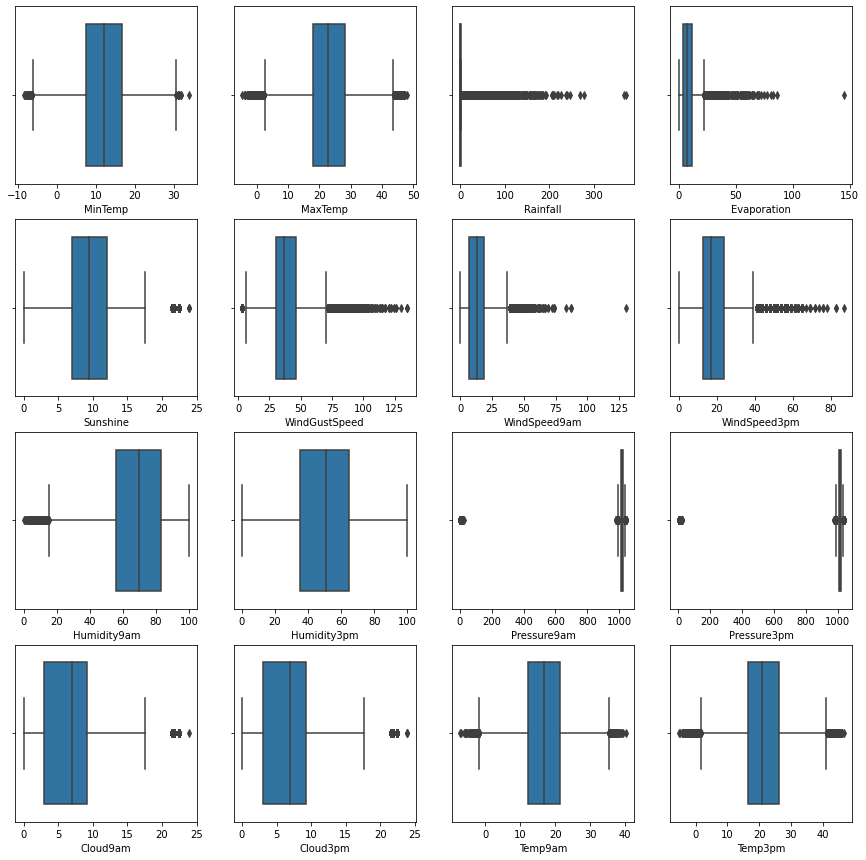

In [18]:
n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
    
plt.show()

<br>

**Removing Outliers from Numerical Columns**

In [19]:
def removeOutliers(numerical):
    global df
    for i in range(len(numerical)):
        q1 = df[numerical[i]].quantile(0.25)
        q3 = df[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR        
        df.loc[(df[numerical[i]] <= minimum), numerical[i]] = minimum
        df.loc[(df[numerical[i]] >= maximum), numerical[i]] = maximum  


In [20]:
removeOutliers(numerical)

			BOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:


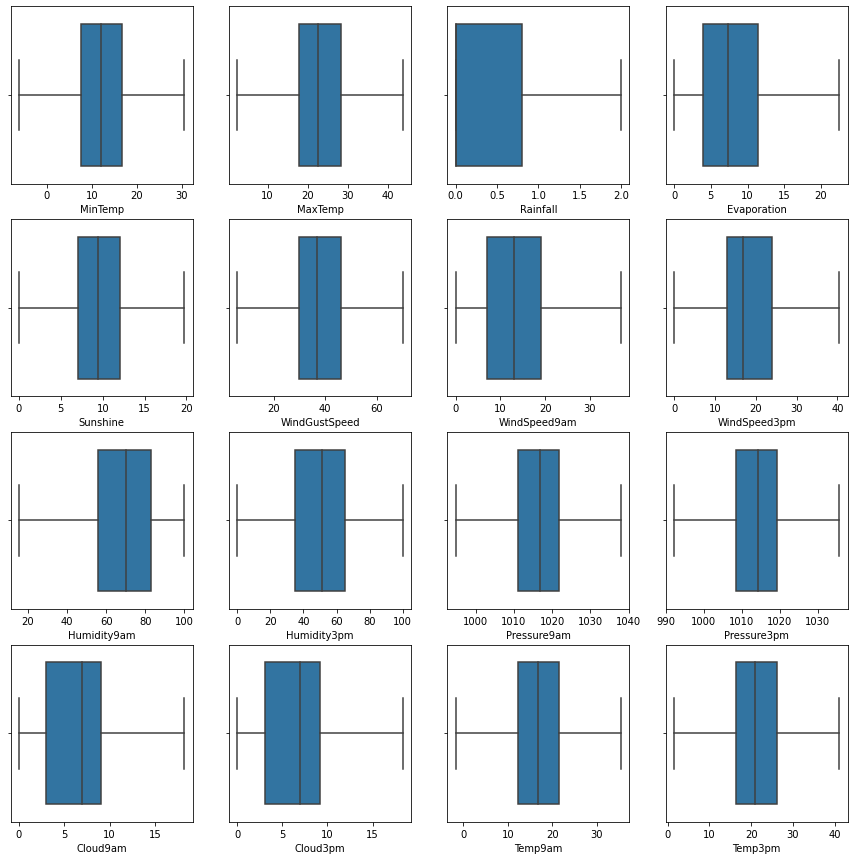

In [21]:
n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

<br>

**Removing Missing Values from Categorical Columns**

In [22]:
cat_cols.isna().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

**WindGustDir**

There are certain places where the column WindGustDir is completely missing. Running the below cell gives the idea that 'Albany' and 'Newcastle' have all nulll values in 'WindGustDir'. 

In [23]:
# df.groupby('Location').WindGustDir.nunique()

In [24]:
# df.loc[df['Location'] == 'Newcastle'][['WindGustDir','WindGustSpeed','WindDir9am','WindSpeed9am','WindDir3pm','WindSpeed3pm']]

In [25]:
# For WindGustDir column only
ls_WGD = []
places_list = df["Location"].unique()
for j in range(len(places_list)):
    df_allNanWGD = df.loc[df["Location"] == places_list[j]]
    if(df_allNanWGD["WindGustDir"].isnull().all()):
        ls_WGD.append(places_list[j])

print(ls_WGD)

['Newcastle', 'Albany']


In [26]:
df.loc[(df.Location=='Newcastle') | (df.Location == 'Albany')].shape[0]

5971

So there are 5971 such rows out of 142193 rows. As a naive approach these rows can droped. But the coorect procedure of assigning WindGustDir to these locations could be assigning them with WindGustDir values of their nearby locations.

In [27]:
df.drop(df[(df.Location == 'Newcastle') | (df.Location == 'Albany')].index,inplace=True)

<br>

**WindGustDir,RainToday, WindDir9am, WindDir3am**

There are still null values spread out in different cells. These can be imputed with the MODE of that categorical column wrt Location.

In [28]:
df[categorical].isna().sum()

Date               0
Location           0
WindGustDir     3359
WindDir9am      8415
WindDir3pm      1769
RainToday       1360
RainTomorrow       0
dtype: int64

In [29]:
places_list = df.Location.unique().tolist()
ls = []

def removeNull(columns):
    for j in range(len(columns)):
        ls = []
        for i in range(len(places_list)): 
            ls.append(df.loc[df["Location"] == places_list[i], columns[j]].mode()[0])
        for i in range(len(places_list)):
            df.loc[df["Location"] == places_list[i], columns[j]] = df.loc[df["Location"] == places_list[i], columns[j]].fillna(ls[i])
        df[columns] = df[columns].astype(object)

In [30]:
removeNull(categorical)

<br>

**Checking variation in groups in individual categorical cols**

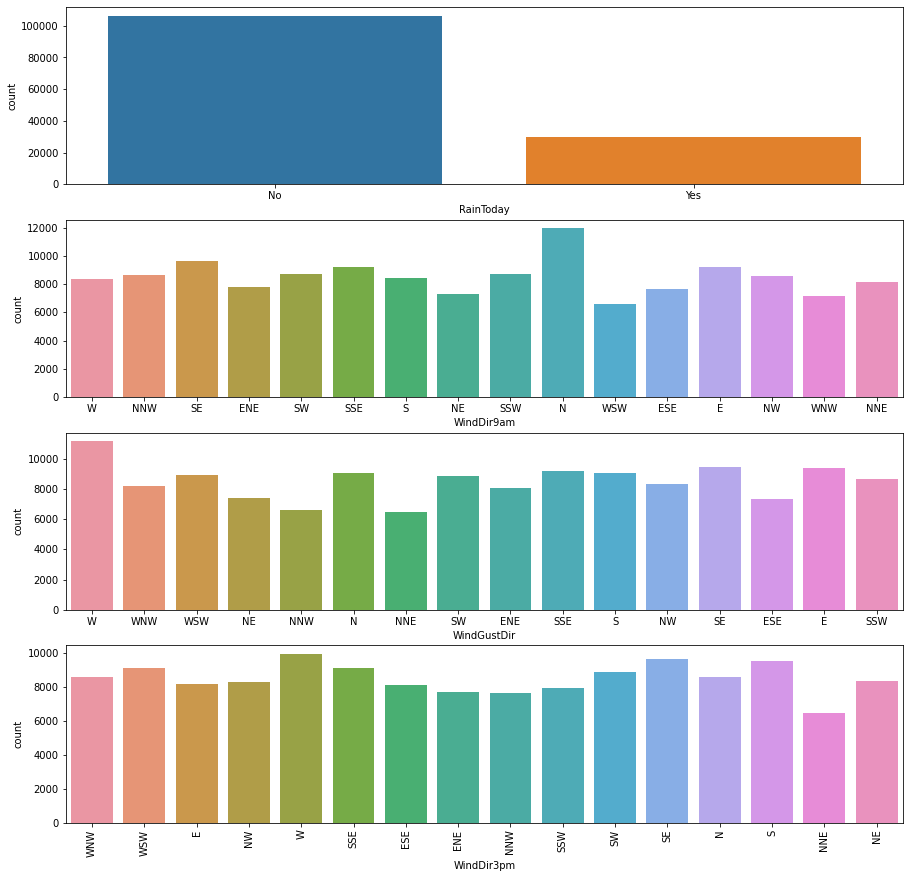

In [31]:
categoricalPlot = ['RainToday', 'WindDir9am','WindGustDir', 'WindDir3pm']
fig, ax = plt.subplots(4, 1, figsize=(15,15))
c=0
while c<=3:
    sns.countplot(df[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.show()

<br>

> # FEATURE ENGINEERING  <a class="anchor" id="engineer"></a>

In [32]:
df.Date = pd.to_datetime(df.Date)

In [33]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df.drop(columns=["Date"], axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,9.1,9.1,W,44.0,W,WNW,...,8.0,9.1,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,9.1,9.1,WNW,44.0,NNW,WSW,...,9.1,9.1,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,9.1,9.1,WSW,46.0,W,WSW,...,9.1,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,9.1,9.1,NE,24.0,SE,E,...,9.1,9.1,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,9.1,9.1,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [34]:
# df.groupby('year').RainToday.value_counts()

In [35]:
#performing labelEncoding on y i.e RainTommorrow
le = LabelEncoder()
df['RainTomorrow']= le.fit_transform(df['RainTomorrow'])
df.RainTomorrow.value_counts()

0    105978
1     30244
Name: RainTomorrow, dtype: int64

In [36]:
#Performing one hot encoding on RainToday, WindGustDir, WindDir9am, WindDir3pm, Location.
df_WindGustDir = pd.get_dummies(df["WindGustDir"], prefix="1")
df_WindDir9am = pd.get_dummies(df["WindDir9am"], prefix="2")
df_WindDir3pm = pd.get_dummies(df["WindDir3pm"], prefix="3")
df_RainToday = pd.get_dummies(df["RainToday"])
location_ohe = pd.get_dummies(df["Location"])
df_new = pd.concat([df, df_WindGustDir, df_WindDir9am, df_WindDir3pm, df_RainToday, location_ohe], axis=1)
df_new.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "Location"], axis=1, inplace=True)

In [37]:
#Taking average of columns annd create new column
df_new["AvgTemp"] = (df_new["MinTemp"]+df_new["MaxTemp"])/2
df_new["AvgWindSpeed"] = (df_new["WindSpeed3pm"]+df_new["WindSpeed9am"])/2
df_new["AvgHumidity"] = (df_new["Humidity3pm"]+df_new["Humidity9am"])/2
df_new["AvgPressure"] = (df_new["Pressure3pm"]+df_new["Pressure9am"])/2
df_new["AvgCloud"] = (df_new["Cloud3pm"]+df_new["Cloud9am"])/2
df_new["AvgTemp"] = (df_new["Temp3pm"]+df_new["Temp9am"])/2

In [38]:
df_new.drop(columns=["MinTemp",'MaxTemp','WindSpeed3pm','WindSpeed9am','Humidity3pm','Humidity9am','Pressure3pm','Pressure9am','Cloud3pm','Cloud9am','Temp3pm','Temp9am'], axis = 1, inplace=True)

In [39]:
df_new.drop(columns=["RISK_MM"], axis = 1, inplace=True)

In [40]:
df_new.head()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainTomorrow,year,month,day,1_E,1_ENE,...,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,AvgTemp,AvgWindSpeed,AvgHumidity,AvgPressure,AvgCloud
0,0.6,9.1,9.1,44.0,0,2008,12,1,0,0,...,0,0,0,0,0,19.35,22.0,46.5,1007.40,8.55
1,0.0,9.1,9.1,44.0,0,2008,12,2,0,0,...,0,0,0,0,0,20.75,13.0,34.5,1009.20,9.10
2,0.0,9.1,9.1,46.0,0,2008,12,3,0,0,...,0,0,0,0,0,22.10,22.5,34.0,1008.15,5.55
3,0.0,9.1,9.1,24.0,0,2008,12,4,0,0,...,0,0,0,0,0,22.30,10.0,30.5,1015.20,9.10
4,1.0,9.1,9.1,41.0,0,2008,12,5,0,0,...,0,0,0,0,0,23.75,13.5,57.5,1008.40,7.50


<br>

**Splitting into train test**

In [41]:
X = df_new.loc[:,df_new.columns != "RainTomorrow"]
y = df_new.loc[:,["RainTomorrow"]]

In [42]:
y.RainTomorrow.value_counts()

0    105978
1     30244
Name: RainTomorrow, dtype: int64

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.80, random_state=2, )
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(108977, 109)
(27245, 109)
(108977, 1)
(27245, 1)


#### Standardisation

In [44]:
scaler = StandardScaler()
#fitting standardization on train data only
scaler.fit(Xtrain)
XtrainSTD = scaler.transform(Xtrain)
XtestSTD = scaler.transform(Xtest)

<br>

> # PCA  <a class="anchor" id="pca"></a>

In [45]:
n_components=50
pca = PCA(n_components=n_components)
pca.fit(XtrainSTD)
XtrainPCA = pca.transform(XtrainSTD)
XtestPCA = pca.transform(XtestSTD)
XtrainPCA.shape

(108977, 50)

In [46]:
pca.explained_variance_ratio_

array([0.0358453 , 0.02758944, 0.02303254, 0.02090791, 0.01994459,
       0.01939967, 0.01838584, 0.0162014 , 0.01529827, 0.01467017,
       0.01421082, 0.01313495, 0.01296544, 0.01256383, 0.0122528 ,
       0.01210556, 0.0115596 , 0.01143242, 0.0112796 , 0.01115302,
       0.01110225, 0.01090556, 0.01066731, 0.01057337, 0.01050034,
       0.01039018, 0.01023784, 0.010217  , 0.0101463 , 0.01001032,
       0.00992184, 0.00987453, 0.00980487, 0.00969768, 0.00965274,
       0.00959409, 0.00958101, 0.00951893, 0.00942526, 0.00937182,
       0.00934537, 0.00929433, 0.00927197, 0.00919862, 0.0091667 ,
       0.00909333, 0.00907385, 0.00903552, 0.00899001, 0.00891259])

<AxesSubplot:xlabel='PC', ylabel='var'>

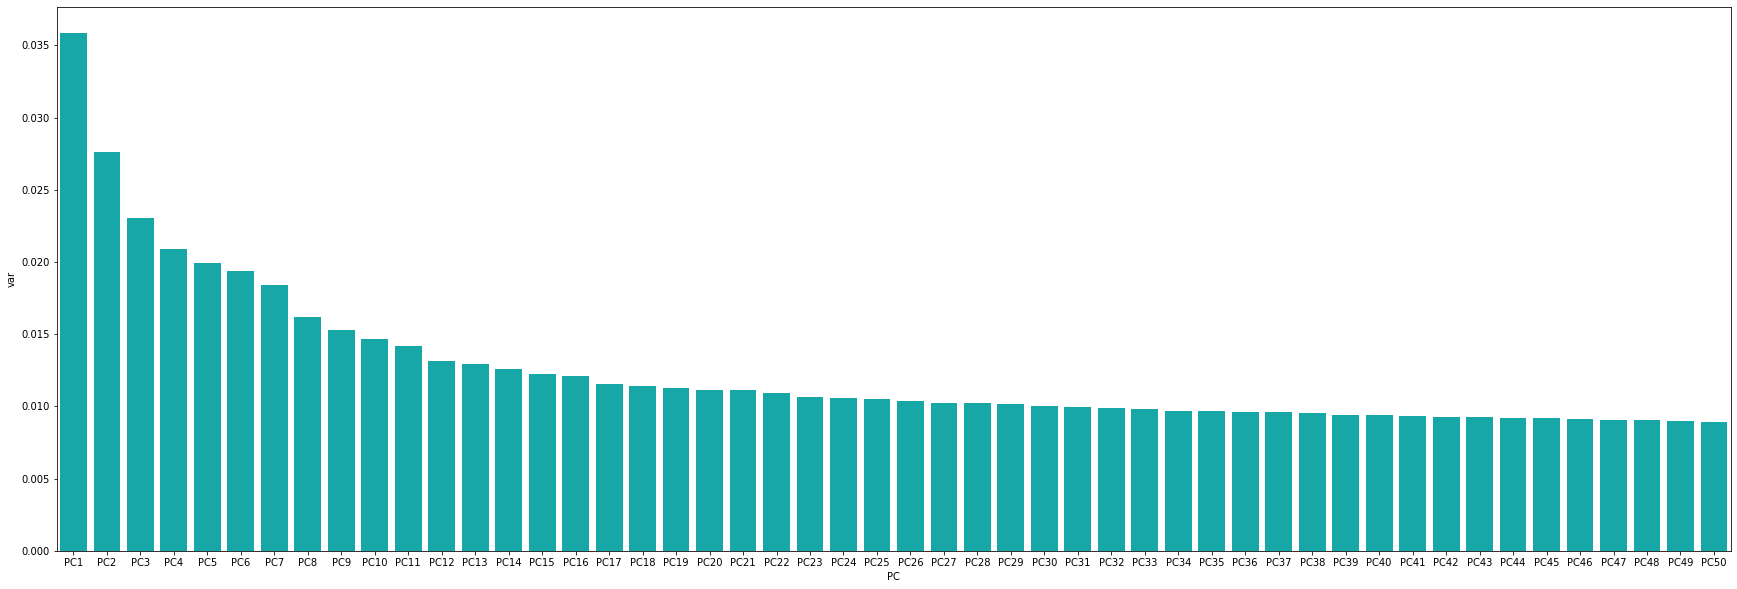

In [47]:
PC = []
for i in range(1,n_components+1):
    PC.append('PC'+str(i))
    
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':PC})
plt.figure(figsize=(30,10))
sns.barplot(x='PC',y="var", data=pca_df, color="c")

<br>

> # MODEL  <a class="anchor" id="model"></a>

**Using Logistic Regression:**

In [48]:
lr = LogisticRegression(random_state=0)
parameters = {'penalty': ['l1', 'l2'],
              'fit_intercept':[True, False]
             }
grid_search = GridSearchCV(estimator=lr, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=10, n_jobs=-1)
grid_search = grid_search.fit(XtrainSTD, ytrain.values.ravel())

In [49]:
print("Best Parameters : ",grid_search.best_params_)
print("Best AUC-ROC : ", grid_search.best_score_)

Best Parameters :  {'fit_intercept': True, 'penalty': 'l2'}
Best AUC-ROC :  0.8509709579304335


Fitting the best parameters to build the model:

In [50]:
lr = LogisticRegression(fit_intercept=True, penalty='l2', random_state=0)
lr.fit(XtrainSTD, ytrain)
predict = lr.predict(XtestSTD)
accuracy = accuracy_score(predict, ytest)
roc_score = roc_auc_score(predict, ytest)
print(accuracy)

0.8400807487612406


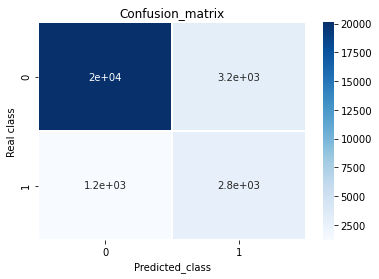

In [51]:
cnf_matrix = confusion_matrix(predict, ytest)
sns.heatmap(cnf_matrix,cmap="Blues",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

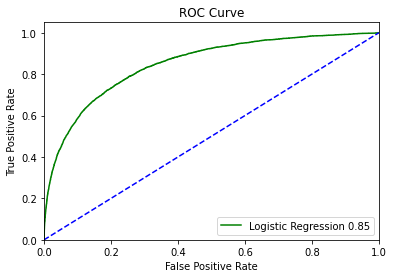

In [52]:
def plot_curve(model, X_test, y_test,score, model_label):
    
    # function to plot roc curve for the given model
    y_score = pd.DataFrame(model.predict_proba(X_test))[1]
    fpr,tpr, threshold = roc_curve(y_test, y_score)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='green', label='{} {}'.format(model_label,np.round(score,2)))
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
plot_curve(lr, XtestSTD, ytest, grid_search.best_score_, "Logistic Regression")

<br>

<br>

<img src="https://cdn.shortpixel.ai/spai/w_1082+q_glossy+ret_img+to_webp/https://londonerinsydney.com/wp-content/uploads/2020/02/THINGS-TO-DO-IN-THE-RAIN1.jpg" width="500px" aspect="5">